# Pipeline 1: Collecting and preparing the dataset

Copyright 2024, Denis Rothman

**Pipeline Overview:**
1. Data collection from Kaggle (Bank Customer Churn dataset)
2. Exploratory Data Analysis (EDA)
3. Machine Learning clustering (K-means)
4. Dataset preparation for vector store

**Local Jupyter Setup:** Uses `.env` file for API keys (not Google Colab)

# Environment Setup

This notebook uses local environment with `.env` file for API keys.

In [1]:
# Import required modules
import os
from dotenv import load_dotenv

# Load API keys from .env file
load_dotenv()

# Optional: Kaggle credentials for dataset download
# Add to .env file:
#   KAGGLE_USERNAME=your_username
#   KAGGLE_KEY=your_key

if os.getenv("KAGGLE_USERNAME") and os.getenv("KAGGLE_KEY"):
    os.environ['KAGGLE_USERNAME'] = os.getenv("KAGGLE_USERNAME")
    os.environ['KAGGLE_KEY'] = os.getenv("KAGGLE_KEY")
    print("✓ Kaggle credentials configured")
else:
    print("⚠ Kaggle credentials not found in .env (optional for dataset download)")
    print("  You can use the pre-downloaded data1.csv file instead")

✓ Kaggle credentials configured


# 1.Data collection and processing

## Installing the environment for Kaggle

## Kaggle Authentication

**Option 1 (Recommended):** Add Kaggle credentials to `.env` file:
```
KAGGLE_USERNAME=your_username
KAGGLE_KEY=your_api_key
```

**Option 2:** Use pre-downloaded `data1.csv` file (available in this directory)

**Note:** Kaggle credentials are only needed if you want to download the dataset directly.

Kaggle credentials for authentification

In [2]:
# Kaggle authentication (already configured in Environment Setup)
try:
    import kaggle
    kaggle.api.authenticate()
    print("✓ Kaggle API authenticated")
except Exception as e:
    print(f"⚠ Kaggle authentication failed: {e}")
    print("  You can skip dataset download and use the pre-downloaded data1.csv file")

✓ Kaggle API authenticated


In [3]:
kaggle.api.authenticate()

# 1. Data Collection and Processing

## Collecting the Bank Customer Churn dataset


https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [4]:
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

with zipfile.ZipFile('bank-customer-churn.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

print("File Unzipped!")

File Unzipped!


In [6]:
import pandas as pd

# Load the CSV file
file_path = 'Customer-Churn-Records.csv'
data1 = pd.read_csv(file_path)

# Drop columns and update the DataFrame in place
data1.drop(columns=['RowNumber','Surname', 'Gender','Geography'], inplace=True)
data1

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Save dataset

In [7]:
# Save dataset locally
data1.to_csv('data1.csv', index=False, encoding='utf-8')
print("✓ Dataset saved to data1.csv")

✓ Dataset saved to data1.csv


## Dataset Overview Visualizations

Let's visualize the key characteristics of our bank customer dataset.

In [8]:
# Dataset shape and basic statistics
print(f"Dataset Shape: {data1.shape}")
print(f"\nTotal Customers: {len(data1):,}")
print(f"Total Features: {len(data1.columns)}")
print(f"\nChurn Rate: {(data1['Exited'].sum() / len(data1) * 100):.2f}%")
print(f"Complaint Rate: {(data1['Complain'].sum() / len(data1) * 100):.2f}%")

Dataset Shape: (10000, 14)

Total Customers: 10,000
Total Features: 14

Churn Rate: 20.38%
Complaint Rate: 20.44%


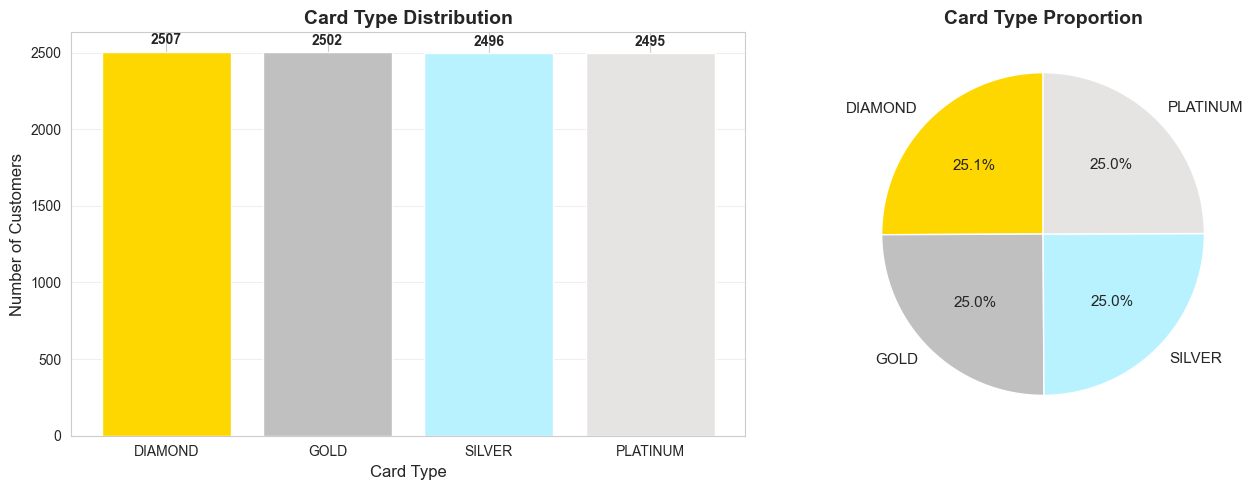


Card Type Distribution:
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Card Type Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
card_counts = data1['Card Type'].value_counts()
ax1.bar(card_counts.index, card_counts.values, color=['#FFD700', '#C0C0C0', '#B9F2FF', '#E5E4E2'])
ax1.set_title('Card Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Card Type', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(card_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#FFD700', '#C0C0C0', '#B9F2FF', '#E5E4E2']
ax2.pie(card_counts.values, labels=card_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 11})
ax2.set_title('Card Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCard Type Distribution:")
print(card_counts)

# 2.Exploratory Data Analysis (EDA)


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [11]:
data1

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Complain and exited

In [12]:
# Calculate sum of 'Exited' and 'Complain' where values are 1
sum_exited = (data1['Exited'] == 1).sum()
sum_complain = (data1['Complain'] == 1).sum()

# Calculate the percentage of complain over exited
if sum_exited > 0:  # To avoid division by zero
    percentage_complain_over_exited = (sum_complain/ sum_exited) * 100
else:
    percentage_complain_over_exited = 0

# Print results
print(f"Sum of Exited = {sum_exited}")
print(f"Sum of Complain = {sum_complain}")
print(f"Percentage of complain over exited = {percentage_complain_over_exited:.2f}%")

Sum of Exited = 2038
Sum of Complain = 2044
Percentage of complain over exited = 100.29%


## Age and exited

In [13]:
age=50

In [14]:
# Calculate the sum of customers aged 50 and over who have also exited
sum_age_and_over_among_exited = data1[(data1['Age'] >= age) & (data1['Exited'] == 1)].shape[0]

# Calculate the sum of customers who have exited
sum_exited = (data1['Exited'] == 1).sum()

# Calculate the percentage of customers aged 50 and over among those who have exited
if sum_exited > 0:  # To avoid division by zero
    percentage_age_and_over_among_exited = (sum_age_and_over_among_exited / sum_exited) * 100
else:
    percentage_age_and_over_among_exited = 0

# Print results
print(f"Sum of Age {age} and Over among Exited = {sum_age_and_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of Age {age} and Over among Exited = {percentage_age_and_over_among_exited:.2f}%")

Sum of Age 50 and Over among Exited = 634
Sum of Exited = 2038
Percentage of Age 50 and Over among Exited = 31.11%


## Salary and exited

In [15]:
salary_threshold=100000

In [16]:
# Calculate the sum of customers with an estimated salary over the specified threshold who have also exited
sum_salary_over_among_exited = data1[(data1['EstimatedSalary'] >= salary_threshold) & (data1['Exited'] == 1)].shape[0]

# Calculate the sum of customers who have exited
sum_exited = (data1['Exited'] == 1).sum()

# Calculate the percentage of customers with a salary over the threshold among those who have exited
if sum_exited > 0:  # To avoid division by zero
    percentage_salary_over_among_exited = (sum_salary_over_among_exited / sum_exited) * 100
else:
    percentage_salary_over_among_exited = 0

# Print results
print(f"Sum of Estimated Salary over {salary_threshold} among Exited = {sum_salary_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of Estimated Salary over {salary_threshold} among Exited = {percentage_salary_over_among_exited:.2f}%")

Sum of Estimated Salary over 100000 among Exited = 1045
Sum of Exited = 2038
Percentage of Estimated Salary over 100000 among Exited = 51.28%


## Heatmap

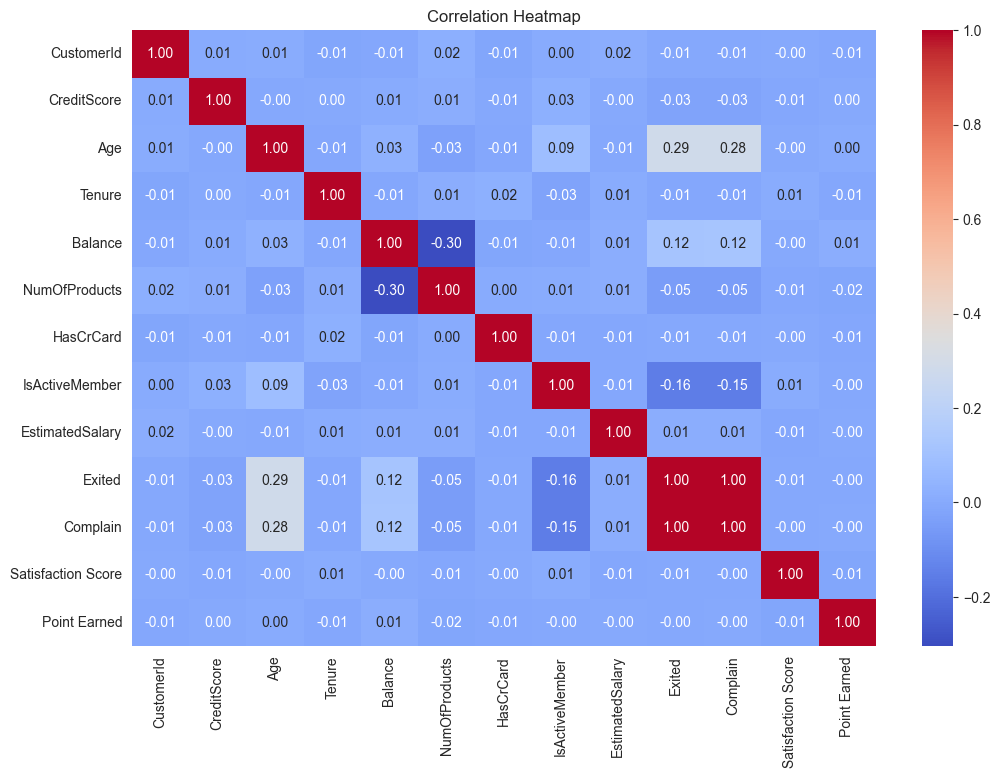

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numerical columns for the correlation heatmap
numerical_columns = data1.select_dtypes(include=['float64', 'int64']).columns
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data1[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Numerical Feature Distributions

Understanding the distribution of key numerical features helps identify patterns and outliers.

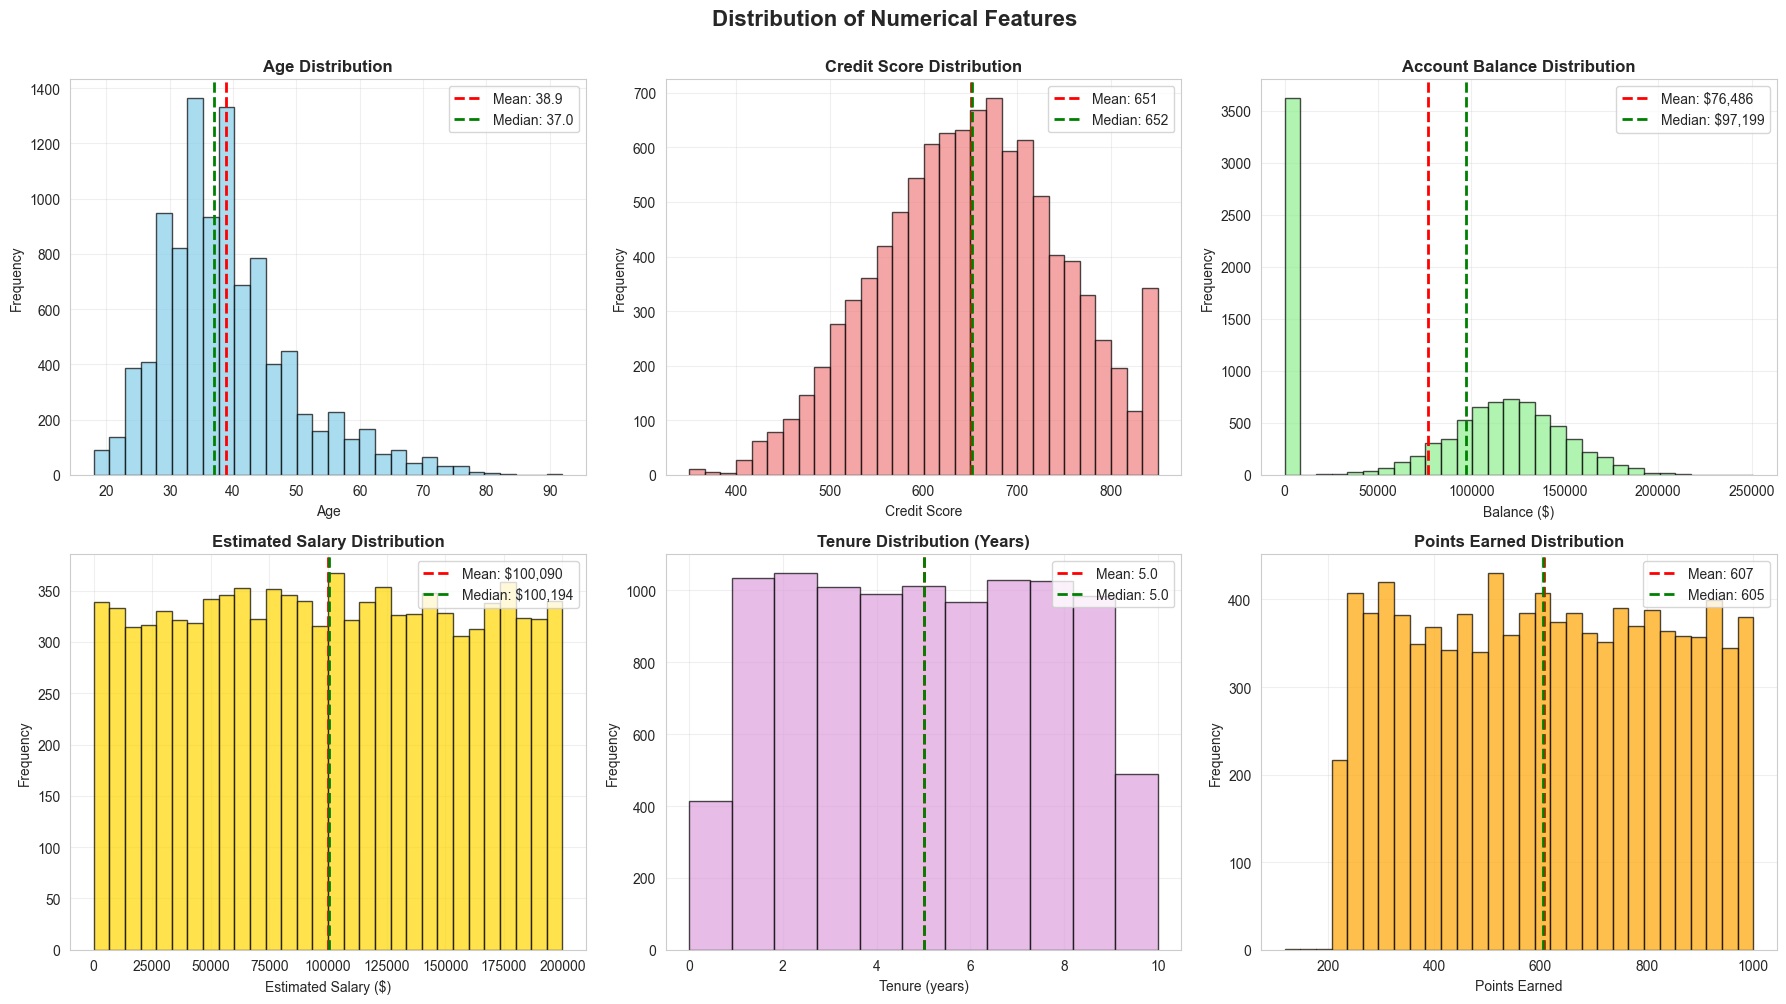

In [18]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)

# Age distribution
axes[0, 0].hist(data1['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(data1['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data1["Age"].mean():.1f}')
axes[0, 0].axvline(data1['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data1["Age"].median():.1f}')
axes[0, 0].set_title('Age Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Credit Score distribution
axes[0, 1].hist(data1['CreditScore'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(data1['CreditScore'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data1["CreditScore"].mean():.0f}')
axes[0, 1].axvline(data1['CreditScore'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data1["CreditScore"].median():.0f}')
axes[0, 1].set_title('Credit Score Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Balance distribution
axes[0, 2].hist(data1['Balance'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(data1['Balance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${data1["Balance"].mean():,.0f}')
axes[0, 2].axvline(data1['Balance'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${data1["Balance"].median():,.0f}')
axes[0, 2].set_title('Account Balance Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Balance ($)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Estimated Salary distribution
axes[1, 0].hist(data1['EstimatedSalary'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(data1['EstimatedSalary'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${data1["EstimatedSalary"].mean():,.0f}')
axes[1, 0].axvline(data1['EstimatedSalary'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${data1["EstimatedSalary"].median():,.0f}')
axes[1, 0].set_title('Estimated Salary Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Estimated Salary ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Tenure distribution
axes[1, 1].hist(data1['Tenure'], bins=11, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(data1['Tenure'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data1["Tenure"].mean():.1f}')
axes[1, 1].axvline(data1['Tenure'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data1["Tenure"].median():.1f}')
axes[1, 1].set_title('Tenure Distribution (Years)', fontweight='bold')
axes[1, 1].set_xlabel('Tenure (years)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Points Earned distribution
axes[1, 2].hist(data1['Point Earned'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(data1['Point Earned'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data1["Point Earned"].mean():.0f}')
axes[1, 2].axvline(data1['Point Earned'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data1["Point Earned"].median():.0f}')
axes[1, 2].set_title('Points Earned Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Points Earned')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Categorical Features Analysis

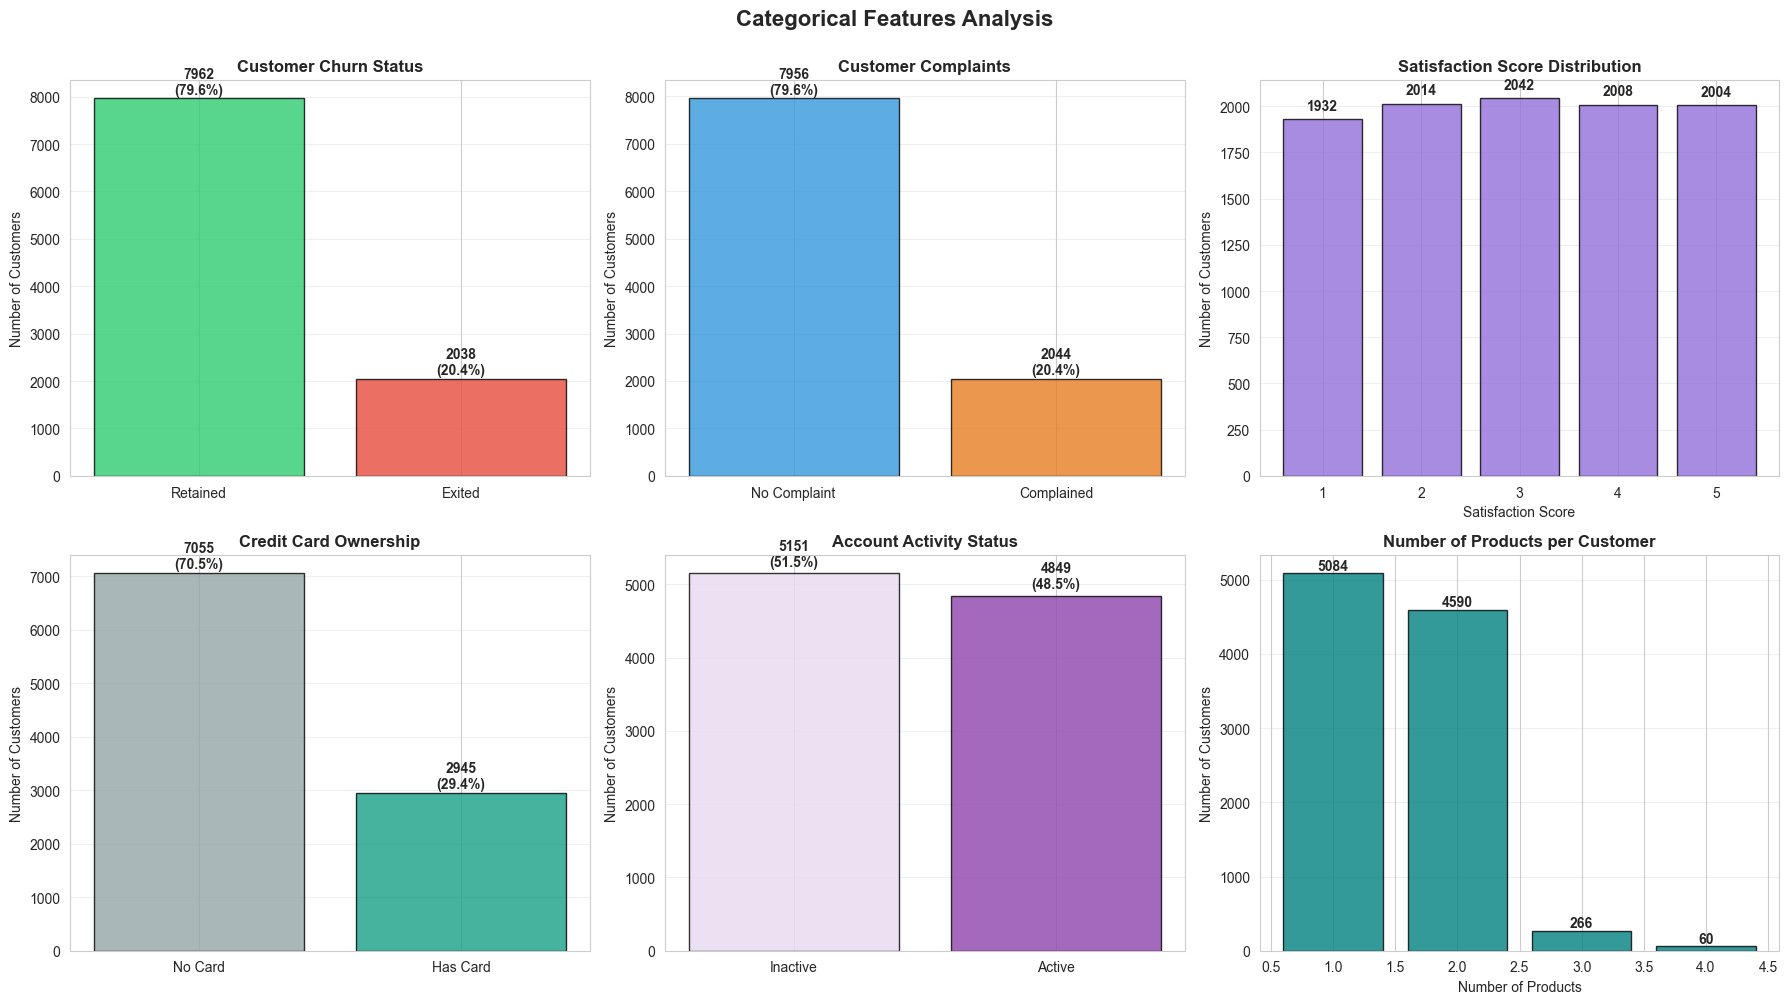

In [19]:
# Categorical features analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold', y=1.00)

# Exited (Churn)
exited_counts = data1['Exited'].value_counts()
colors_exit = ['#2ecc71', '#e74c3c']
axes[0, 0].bar(['Retained', 'Exited'], exited_counts.values, color=colors_exit, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Customer Churn Status', fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(exited_counts.values):
    axes[0, 0].text(i, v + 100, f'{v}\n({v/len(data1)*100:.1f}%)', ha='center', fontweight='bold')

# Complain
complain_counts = data1['Complain'].value_counts()
colors_complain = ['#3498db', '#e67e22']
axes[0, 1].bar(['No Complaint', 'Complained'], complain_counts.values, color=colors_complain, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Customer Complaints', fontweight='bold')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(complain_counts.values):
    axes[0, 1].text(i, v + 100, f'{v}\n({v/len(data1)*100:.1f}%)', ha='center', fontweight='bold')

# Satisfaction Score
satisfaction_counts = data1['Satisfaction Score'].value_counts().sort_index()
axes[0, 2].bar(satisfaction_counts.index, satisfaction_counts.values, color='mediumpurple', edgecolor='black', alpha=0.8)
axes[0, 2].set_title('Satisfaction Score Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Satisfaction Score')
axes[0, 2].set_ylabel('Number of Customers')
axes[0, 2].grid(axis='y', alpha=0.3)
for i, (score, count) in enumerate(satisfaction_counts.items()):
    axes[0, 2].text(score, count + 50, str(count), ha='center', fontweight='bold')

# Has Credit Card
card_counts = data1['HasCrCard'].value_counts()
axes[1, 0].bar(['No Card', 'Has Card'], card_counts.values, color=['#95a5a6', '#16a085'], edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Credit Card Ownership', fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(card_counts.values):
    axes[1, 0].text(i, v + 100, f'{v}\n({v/len(data1)*100:.1f}%)', ha='center', fontweight='bold')

# Is Active Member
active_counts = data1['IsActiveMember'].value_counts()
axes[1, 1].bar(['Inactive', 'Active'], active_counts.values, color=['#e8daef', '#8e44ad'], edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Account Activity Status', fontweight='bold')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(active_counts.values):
    axes[1, 1].text(i, v + 100, f'{v}\n({v/len(data1)*100:.1f}%)', ha='center', fontweight='bold')

# Number of Products
products_counts = data1['NumOfProducts'].value_counts().sort_index()
axes[1, 2].bar(products_counts.index, products_counts.values, color='teal', edgecolor='black', alpha=0.8)
axes[1, 2].set_title('Number of Products per Customer', fontweight='bold')
axes[1, 2].set_xlabel('Number of Products')
axes[1, 2].set_ylabel('Number of Customers')
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (prod, count) in enumerate(products_counts.items()):
    axes[1, 2].text(prod, count + 50, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Churn Analysis by Key Factors

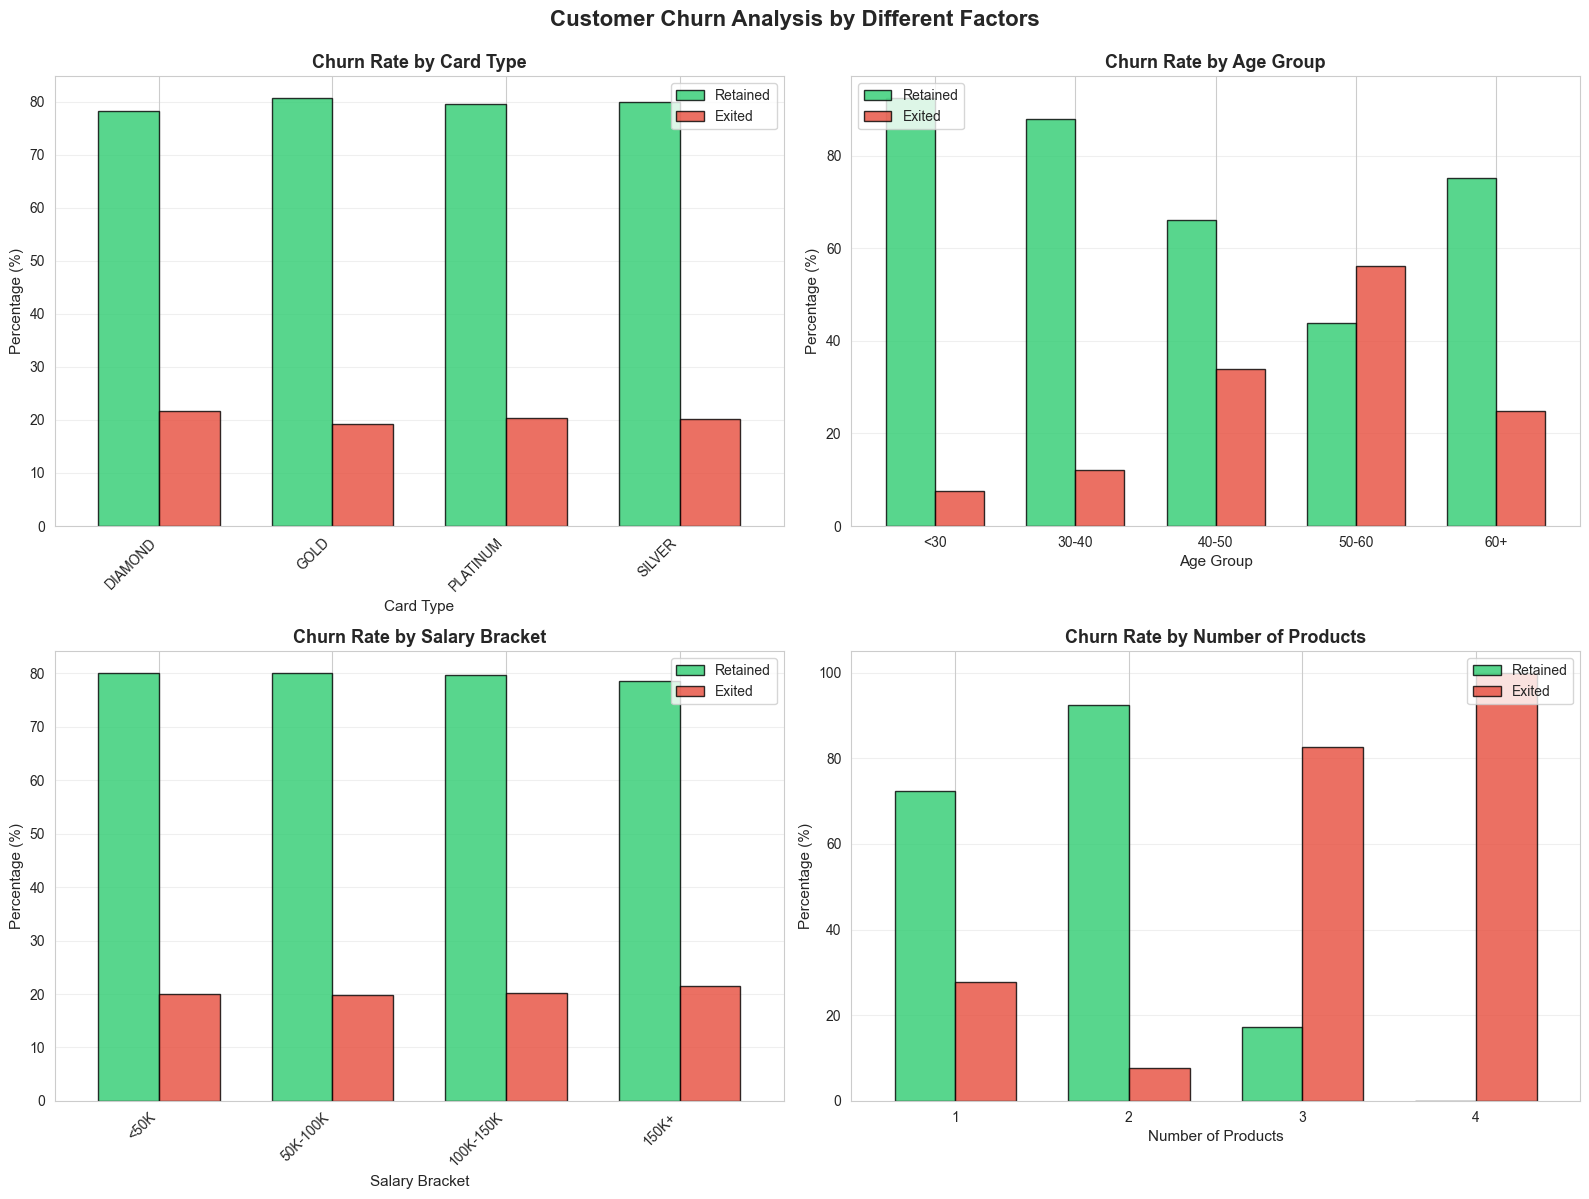


KEY CHURN INSIGHTS

1. Age Group with Highest Churn: 50-60 (56.2%)
2. Card Type with Highest Churn: DIAMOND (21.8%)
3. Products Count with Highest Churn: 4 products (100.0%)
4. Salary Bracket with Highest Churn: 150K+ (21.5%)


In [20]:
# Churn analysis by key factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Churn Analysis by Different Factors', fontsize=16, fontweight='bold', y=0.995)

# 1. Churn by Card Type
churn_by_card = pd.crosstab(data1['Card Type'], data1['Exited'], normalize='index') * 100
churn_by_card.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'], 
                   edgecolor='black', alpha=0.8, width=0.7)
axes[0, 0].set_title('Churn Rate by Card Type', fontweight='bold', fontsize=13)
axes[0, 0].set_xlabel('Card Type', fontsize=11)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 0].legend(['Retained', 'Exited'], loc='upper right')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Churn by Age Group
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
data1['AgeGroup'] = pd.cut(data1['Age'], bins=age_bins, labels=age_labels)
churn_by_age = pd.crosstab(data1['AgeGroup'], data1['Exited'], normalize='index') * 100
churn_by_age.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], 
                  edgecolor='black', alpha=0.8, width=0.7)
axes[0, 1].set_title('Churn Rate by Age Group', fontweight='bold', fontsize=13)
axes[0, 1].set_xlabel('Age Group', fontsize=11)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 1].legend(['Retained', 'Exited'], loc='upper left')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Churn by Salary Bracket
salary_bins = [0, 50000, 100000, 150000, 200000]
salary_labels = ['<50K', '50K-100K', '100K-150K', '150K+']
data1['SalaryBracket'] = pd.cut(data1['EstimatedSalary'], bins=salary_bins, labels=salary_labels)
churn_by_salary = pd.crosstab(data1['SalaryBracket'], data1['Exited'], normalize='index') * 100
churn_by_salary.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'], 
                     edgecolor='black', alpha=0.8, width=0.7)
axes[1, 0].set_title('Churn Rate by Salary Bracket', fontweight='bold', fontsize=13)
axes[1, 0].set_xlabel('Salary Bracket', fontsize=11)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 0].legend(['Retained', 'Exited'], loc='upper right')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Churn by Number of Products
churn_by_products = pd.crosstab(data1['NumOfProducts'], data1['Exited'], normalize='index') * 100
churn_by_products.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'], 
                       edgecolor='black', alpha=0.8, width=0.7)
axes[1, 1].set_title('Churn Rate by Number of Products', fontweight='bold', fontsize=13)
axes[1, 1].set_xlabel('Number of Products', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(['Retained', 'Exited'], loc='upper right')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print key insights
print("\n" + "="*60)
print("KEY CHURN INSIGHTS")
print("="*60)
print(f"\n1. Age Group with Highest Churn: {churn_by_age[1].idxmax()} ({churn_by_age[1].max():.1f}%)")
print(f"2. Card Type with Highest Churn: {churn_by_card[1].idxmax()} ({churn_by_card[1].max():.1f}%)")
print(f"3. Products Count with Highest Churn: {churn_by_products[1].idxmax()} products ({churn_by_products[1].max():.1f}%)")
print(f"4. Salary Bracket with Highest Churn: {churn_by_salary[1].idxmax()} ({churn_by_salary[1].max():.1f}%)")

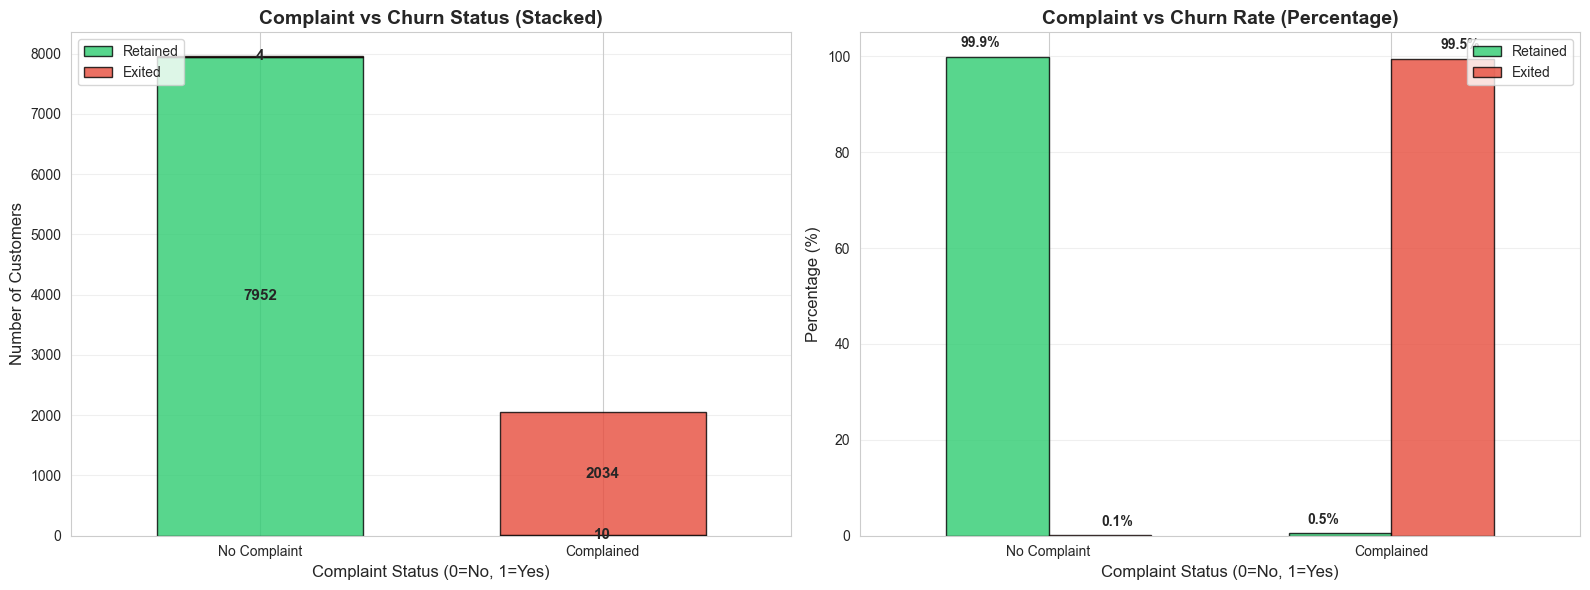


COMPLAINT-CHURN CORRELATION
Customers who complained and exited: 2,034
Churn rate for customers with complaints: 99.51%
Churn rate for customers without complaints: 0.05%

Complaint increases churn risk by: 99.46 percentage points


In [21]:
# Complaint vs Churn relationship
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
complaint_churn = pd.crosstab(data1['Complain'], data1['Exited'])
complaint_churn.plot(kind='bar', stacked=True, ax=axes[0], 
                     color=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.8, width=0.6)
axes[0].set_title('Complaint vs Churn Status (Stacked)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Complaint Status (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].legend(['Retained', 'Exited'], loc='upper left')
axes[0].set_xticklabels(['No Complaint', 'Complained'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fontweight='bold', fontsize=11)

# Grouped bar chart (percentage)
complaint_churn_pct = pd.crosstab(data1['Complain'], data1['Exited'], normalize='index') * 100
complaint_churn_pct.plot(kind='bar', ax=axes[1], 
                         color=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.8, width=0.6)
axes[1].set_title('Complaint vs Churn Rate (Percentage)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Complaint Status (0=No, 1=Yes)', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(['Retained', 'Exited'], loc='upper right')
axes[1].set_xticklabels(['No Complaint', 'Complained'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, 105)

# Add percentage labels
for i, (idx, row) in enumerate(complaint_churn_pct.iterrows()):
    axes[1].text(i - 0.2, row[0] + 2, f'{row[0]:.1f}%', ha='center', fontweight='bold')
    axes[1].text(i + 0.2, row[1] + 2, f'{row[1]:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPLAINT-CHURN CORRELATION")
print("="*60)
print(f"Customers who complained and exited: {complaint_churn.loc[1, 1]:,}")
print(f"Churn rate for customers with complaints: {complaint_churn_pct.loc[1, 1]:.2f}%")
print(f"Churn rate for customers without complaints: {complaint_churn_pct.loc[0, 1]:.2f}%")
print(f"\nComplaint increases churn risk by: {(complaint_churn_pct.loc[1, 1] - complaint_churn_pct.loc[0, 1]):.2f} percentage points")

# 3.Training a Machine Learning Model

In [22]:
# Copying data1 to data2
data2 = data1.copy()

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have a dataframe named data1 loaded as described
# Selecting relevant features
features = data2[['CreditScore', 'Age', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Clustering Quality Metrics: Silhouette Score and Davies-Bouldin Index

Before evaluating our K-means clustering results, let's understand the two key metrics we'll use:

### 1. Silhouette Score

The **Silhouette Score** measures how well-separated clusters are by comparing the intra-cluster cohesion with inter-cluster separation.

**Mathematical Formula:**

For each data point $i$, the silhouette coefficient is:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- $a(i)$ = average distance from point $i$ to all other points in the **same cluster** (cohesion)
- $b(i)$ = average distance from point $i$ to all points in the **nearest neighboring cluster** (separation)

**Interpretation:**
- **Range:** $[-1, 1]$
- **$s(i) \approx 1$**: Point is well-matched to its cluster and far from neighboring clusters (excellent)
- **$s(i) \approx 0$**: Point is close to the decision boundary between two clusters (ambiguous)
- **$s(i) < 0$**: Point may have been assigned to the wrong cluster (poor)
- **Overall Score:** Average of $s(i)$ across all points

**Rule of Thumb:**
- $0.7 < s \leq 1.0$: Strong structure
- $0.5 < s \leq 0.7$: Reasonable structure
- $0.25 < s \leq 0.5$: Weak structure
- $s \leq 0.25$: No substantial structure

---

### 2. Davies-Bouldin Index (DBI)

The **Davies-Bouldin Index** measures cluster similarity by comparing within-cluster scatter to between-cluster separation. **Lower values indicate better clustering.**

**Mathematical Formula:**

$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)$$

Where:
- $k$ = number of clusters
- $s_i$ = average distance from all points in cluster $i$ to the centroid of cluster $i$ (within-cluster scatter)
- $s_j$ = average distance from all points in cluster $j$ to the centroid of cluster $j$
- $d_{ij}$ = distance between centroids of clusters $i$ and $j$ (between-cluster separation)

**Interpretation:**
- **Range:** $[0, \infty)$
- **Lower values = Better clustering** (more compact and well-separated clusters)
- **$DB \approx 0$**: Clusters are far apart and very compact (ideal)
- **High $DB$**: Clusters overlap or have large within-cluster distances

**Rule of Thumb:**
- $DB < 1.0$: Good clustering (well-separated, compact clusters)
- $1.0 \leq DB < 2.0$: Acceptable clustering
- $DB \geq 2.0$: Poor clustering (consider different $k$ or algorithm)

---

### Why Use Both Metrics?

- **Silhouette Score**: Evaluates how well each individual point fits its cluster (point-level analysis)
- **Davies-Bouldin Index**: Evaluates overall cluster quality based on centroids (cluster-level analysis)

Using both metrics together provides a comprehensive view of clustering quality. Ideal results show:
- **High Silhouette Score** (close to 1)
- **Low Davies-Bouldin Index** (close to 0)

Now let's compute these metrics for different values of $k$ (number of clusters):

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Alternative scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Experiment with different numbers of clusters
for n_clusters in range(2, 5):  # Example range from 2 to 5
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)
    print(f'For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f} and the Davies-Bouldin Index is {db_index:.4f}')

For n_clusters=2, the silhouette score is 0.6129 and the Davies-Bouldin Index is 0.6144
For n_clusters=3, the silhouette score is 0.3391 and the Davies-Bouldin Index is 1.1511
For n_clusters=4, the silhouette score is 0.3243 and the Davies-Bouldin Index is 1.0801


In [25]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)  # Explicitly setting n_init to 10
data2['class'] = kmeans.fit_predict(features_scaled)

In [26]:
# Display the first few rows of the dataframe to verify the 'class' column
data2

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,SalaryBracket,class
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,100K-150K,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,100K-150K,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,100K-150K,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40,50K-100K,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50,50K-100K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,30-40,50K-100K,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,30-40,100K-150K,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,30-40,<50K,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,40-50,50K-100K,1


In [27]:
# 1. Sum where 'class' == 0
sum_class_0 = (data2['class'] == 0).sum()
# 2. Sum where 'class' == 0 and 'Complain' == 1
sum_class_0_complain_1 = data2[(data2['class'] == 0) & (data2['Complain'] == 1)].shape[0]
# 3. Sum where 'class' == 0 and 'Exited' == 1
sum_class_0_exited_1 = data2[(data2['class'] == 0) & (data2['Exited'] == 1)].shape[0]

# Print the results
print(f"Sum of 'class' == 0: {sum_class_0}")
print(f"Sum of 'class' == 0 and 'Complain' == 1: {sum_class_0_complain_1}")
print(f"Sum of 'class' == 0 and 'Exited' == 1: {sum_class_0_exited_1}")

Sum of 'class' == 0: 7961
Sum of 'class' == 0 and 'Complain' == 1: 8
Sum of 'class' == 0 and 'Exited' == 1: 1


In [28]:
# 1. Sum where 'class' == 1
sum_class_1 = (data2['class'] == 1).sum()

# 2. Sum where 'class' == 1 and 'Complain' == 1
sum_class_1_complain_1 = data2[(data2['class'] == 1) & (data2['Complain'] == 1)].shape[0]

# 3. Sum where 'class' == 1 and 'Exited' == 1
sum_class_1_exited_1 = data2[(data2['class'] == 1) & (data2['Exited'] == 1)].shape[0]

# Print the results
print(f"Sum of 'class' == 1: {sum_class_1}")
print(f"Sum of 'class' == 1 and 'Complain' == 1: {sum_class_1_complain_1}")
print(f"Sum of 'class' == 1 and 'Exited' == 1: {sum_class_1_exited_1}")

Sum of 'class' == 1: 2039
Sum of 'class' == 1 and 'Complain' == 1: 2036
Sum of 'class' == 1 and 'Exited' == 1: 2037


## Cluster Visualization and Analysis

Let's visualize the K-means clustering results to understand customer segments.

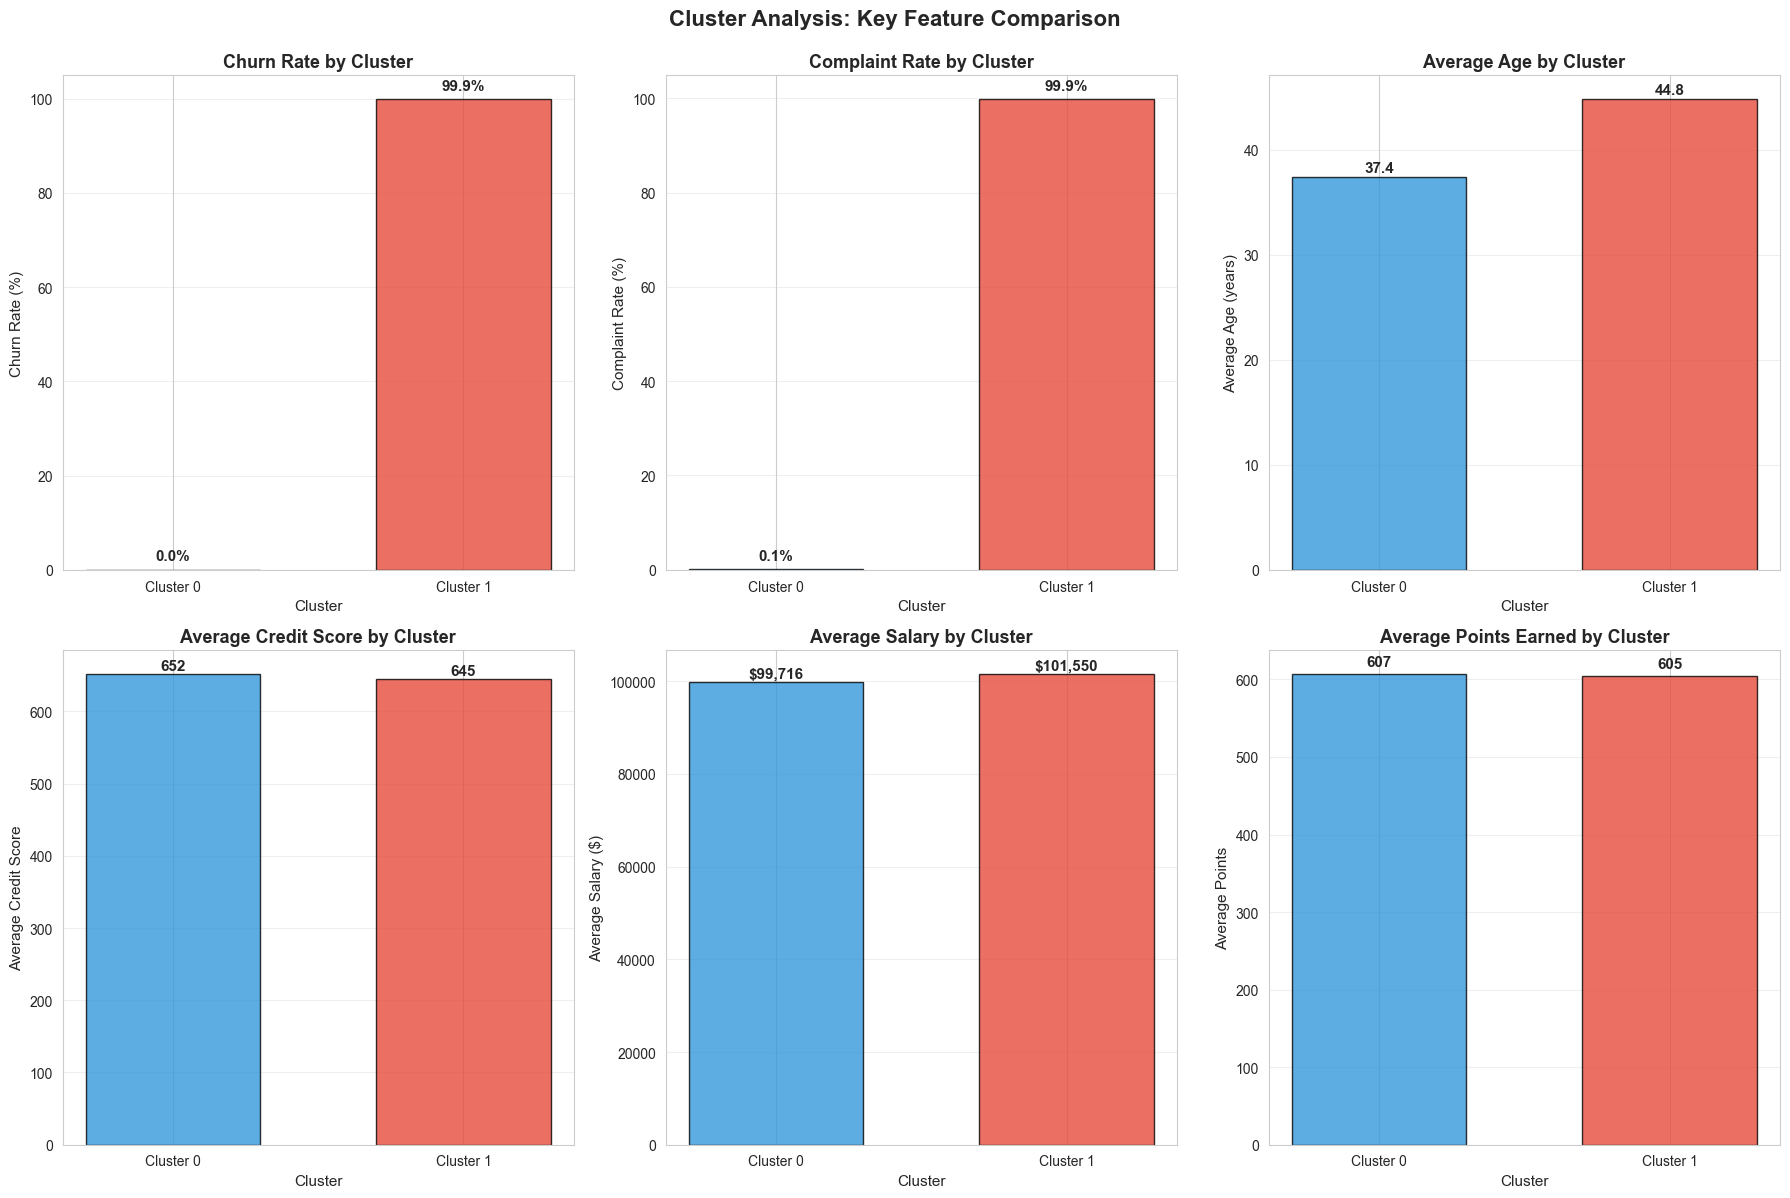


CLUSTER PROFILE SUMMARY

Cluster 0 (Low-Risk): 7,961 customers
  - Churn Rate: 0.01%
  - Complaint Rate: 0.10%
  - Avg Age: 37.4 years
  - Avg Credit Score: 652
  - Avg Salary: $99,716

Cluster 1 (High-Risk): 2,039 customers
  - Churn Rate: 99.90%
  - Complaint Rate: 99.85%
  - Avg Age: 44.8 years
  - Avg Credit Score: 645
  - Avg Salary: $101,550


In [29]:
# Cluster comparison - key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cluster Analysis: Key Feature Comparison', fontsize=16, fontweight='bold', y=0.995)

# Define colors for clusters
cluster_colors = ['#3498db', '#e74c3c']

# 1. Churn Rate by Cluster
churn_by_cluster = data2.groupby('class')['Exited'].mean() * 100
axes[0, 0].bar(churn_by_cluster.index, churn_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[0, 0].set_title('Churn Rate by Cluster', fontweight='bold', fontsize=13)
axes[0, 0].set_xlabel('Cluster', fontsize=11)
axes[0, 0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_by_cluster.values):
    axes[0, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

# 2. Complaint Rate by Cluster
complaint_by_cluster = data2.groupby('class')['Complain'].mean() * 100
axes[0, 1].bar(complaint_by_cluster.index, complaint_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[0, 1].set_title('Complaint Rate by Cluster', fontweight='bold', fontsize=13)
axes[0, 1].set_xlabel('Cluster', fontsize=11)
axes[0, 1].set_ylabel('Complaint Rate (%)', fontsize=11)
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(complaint_by_cluster.values):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

# 3. Average Age by Cluster
age_by_cluster = data2.groupby('class')['Age'].mean()
axes[0, 2].bar(age_by_cluster.index, age_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[0, 2].set_title('Average Age by Cluster', fontweight='bold', fontsize=13)
axes[0, 2].set_xlabel('Cluster', fontsize=11)
axes[0, 2].set_ylabel('Average Age (years)', fontsize=11)
axes[0, 2].set_xticks([0, 1])
axes[0, 2].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[0, 2].grid(axis='y', alpha=0.3)
for i, v in enumerate(age_by_cluster.values):
    axes[0, 2].text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold', fontsize=11)

# 4. Average Credit Score by Cluster
credit_by_cluster = data2.groupby('class')['CreditScore'].mean()
axes[1, 0].bar(credit_by_cluster.index, credit_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[1, 0].set_title('Average Credit Score by Cluster', fontweight='bold', fontsize=13)
axes[1, 0].set_xlabel('Cluster', fontsize=11)
axes[1, 0].set_ylabel('Average Credit Score', fontsize=11)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(credit_by_cluster.values):
    axes[1, 0].text(i, v + 5, f'{v:.0f}', ha='center', fontweight='bold', fontsize=11)

# 5. Average Salary by Cluster
salary_by_cluster = data2.groupby('class')['EstimatedSalary'].mean()
axes[1, 1].bar(salary_by_cluster.index, salary_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[1, 1].set_title('Average Salary by Cluster', fontweight='bold', fontsize=13)
axes[1, 1].set_xlabel('Cluster', fontsize=11)
axes[1, 1].set_ylabel('Average Salary ($)', fontsize=11)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(salary_by_cluster.values):
    axes[1, 1].text(i, v + 1000, f'${v:,.0f}', ha='center', fontweight='bold', fontsize=11)

# 6. Average Points Earned by Cluster
points_by_cluster = data2.groupby('class')['Point Earned'].mean()
axes[1, 2].bar(points_by_cluster.index, points_by_cluster.values, 
               color=cluster_colors, edgecolor='black', alpha=0.8, width=0.6)
axes[1, 2].set_title('Average Points Earned by Cluster', fontweight='bold', fontsize=13)
axes[1, 2].set_xlabel('Cluster', fontsize=11)
axes[1, 2].set_ylabel('Average Points', fontsize=11)
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[1, 2].grid(axis='y', alpha=0.3)
for i, v in enumerate(points_by_cluster.values):
    axes[1, 2].text(i, v + 10, f'{v:.0f}', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CLUSTER PROFILE SUMMARY")
print("="*70)
print(f"\nCluster 0 (Low-Risk): {sum_class_0:,} customers")
print(f"  - Churn Rate: {churn_by_cluster[0]:.2f}%")
print(f"  - Complaint Rate: {complaint_by_cluster[0]:.2f}%")
print(f"  - Avg Age: {age_by_cluster[0]:.1f} years")
print(f"  - Avg Credit Score: {credit_by_cluster[0]:.0f}")
print(f"  - Avg Salary: ${salary_by_cluster[0]:,.0f}")

print(f"\nCluster 1 (High-Risk): {sum_class_1:,} customers")
print(f"  - Churn Rate: {churn_by_cluster[1]:.2f}%")
print(f"  - Complaint Rate: {complaint_by_cluster[1]:.2f}%")
print(f"  - Avg Age: {age_by_cluster[1]:.1f} years")
print(f"  - Avg Credit Score: {credit_by_cluster[1]:.0f}")
print(f"  - Avg Salary: ${salary_by_cluster[1]:,.0f}")

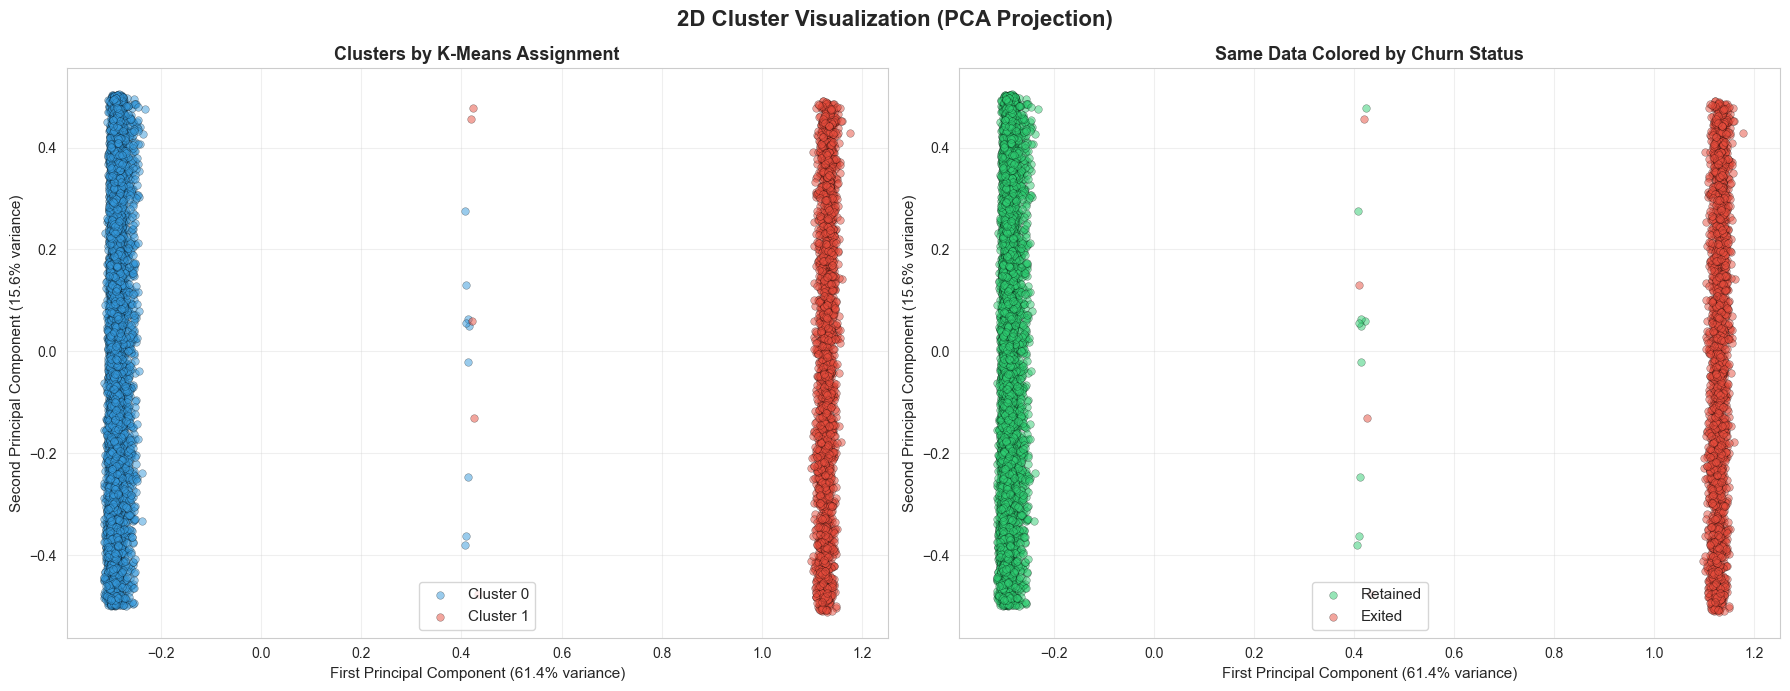


PCA Explained Variance Ratio:
  PC1: 61.41%
  PC2: 15.58%
  Total: 76.99%


In [30]:
# 2D visualization of clusters using PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create DataFrame for easier plotting
pca_df = pd.DataFrame({
    'PC1': features_pca[:, 0],
    'PC2': features_pca[:, 1],
    'Cluster': data2['class'],
    'Exited': data2['Exited']
})

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('2D Cluster Visualization (PCA Projection)', fontsize=16, fontweight='bold')

# Plot 1: Color by Cluster
for cluster in [0, 1]:
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    axes[0].scatter(cluster_data['PC1'], cluster_data['PC2'], 
                   alpha=0.5, s=30, label=f'Cluster {cluster}',
                   color=cluster_colors[cluster], edgecolor='black', linewidth=0.3)

axes[0].set_title('Clusters by K-Means Assignment', fontweight='bold', fontsize=13)
axes[0].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=11)
axes[0].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=11)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(alpha=0.3)

# Plot 2: Color by Churn Status
churn_colors = {0: '#2ecc71', 1: '#e74c3c'}
for exited_status in [0, 1]:
    exited_data = pca_df[pca_df['Exited'] == exited_status]
    label = 'Exited' if exited_status == 1 else 'Retained'
    axes[1].scatter(exited_data['PC1'], exited_data['PC2'], 
                   alpha=0.5, s=30, label=label,
                   color=churn_colors[exited_status], edgecolor='black', linewidth=0.3)

axes[1].set_title('Same Data Colored by Churn Status', fontweight='bold', fontsize=13)
axes[1].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=11)
axes[1].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=11)
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA Explained Variance Ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

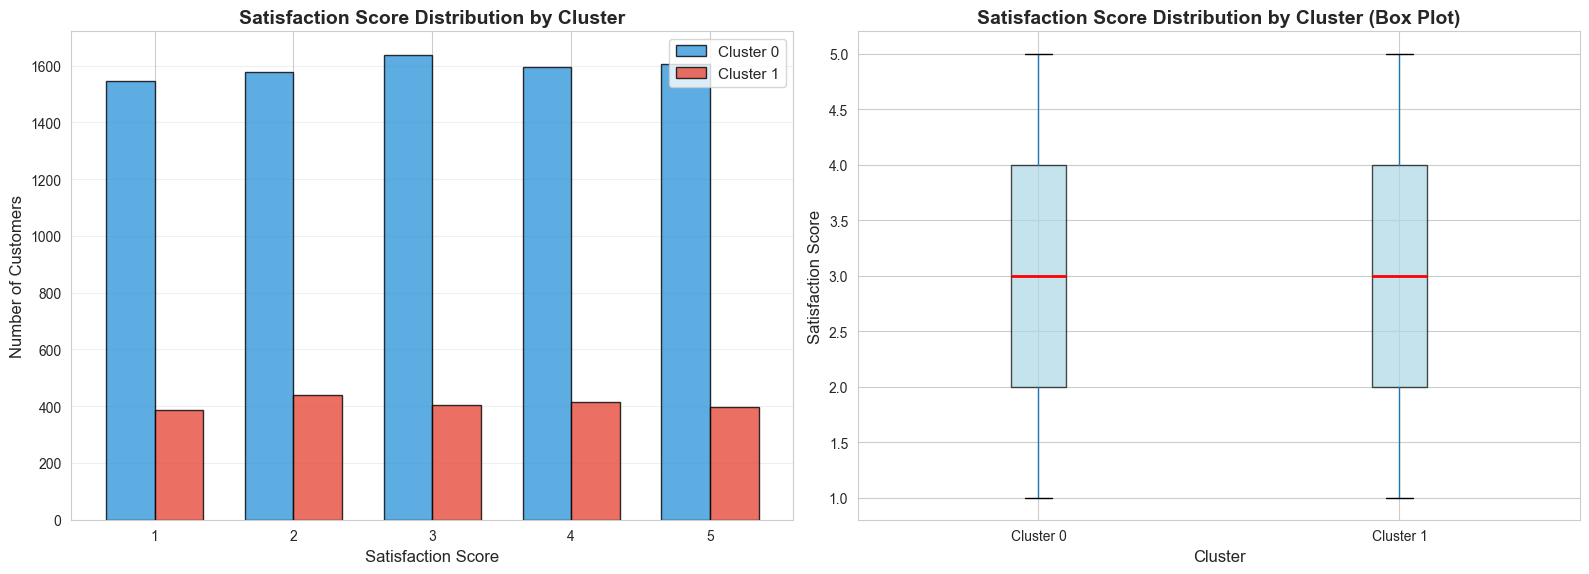


Average Satisfaction Score:
  Cluster 0: 3.02
  Cluster 1: 3.00


In [31]:
# Satisfaction Score distribution by cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grouped bar chart
satisfaction_cluster = pd.crosstab(data2['Satisfaction Score'], data2['class'])
satisfaction_cluster.plot(kind='bar', ax=axes[0], color=cluster_colors, 
                          edgecolor='black', alpha=0.8, width=0.7)
axes[0].set_title('Satisfaction Score Distribution by Cluster', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Satisfaction Score', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].legend(['Cluster 0', 'Cluster 1'], loc='upper right', fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Box plot for comparison
data2.boxplot(column='Satisfaction Score', by='class', ax=axes[1],
              patch_artist=True, 
              boxprops=dict(facecolor='lightblue', alpha=0.7),
              medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Satisfaction Score Distribution by Cluster (Box Plot)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Satisfaction Score', fontsize=12)
axes[1].set_xticklabels(['Cluster 0', 'Cluster 1'])
axes[1].get_figure().suptitle('')  # Remove auto-generated title

plt.tight_layout()
plt.show()

# Calculate average satisfaction by cluster
avg_satisfaction = data2.groupby('class')['Satisfaction Score'].mean()
print(f"\nAverage Satisfaction Score:")
print(f"  Cluster 0: {avg_satisfaction[0]:.2f}")
print(f"  Cluster 1: {avg_satisfaction[1]:.2f}")

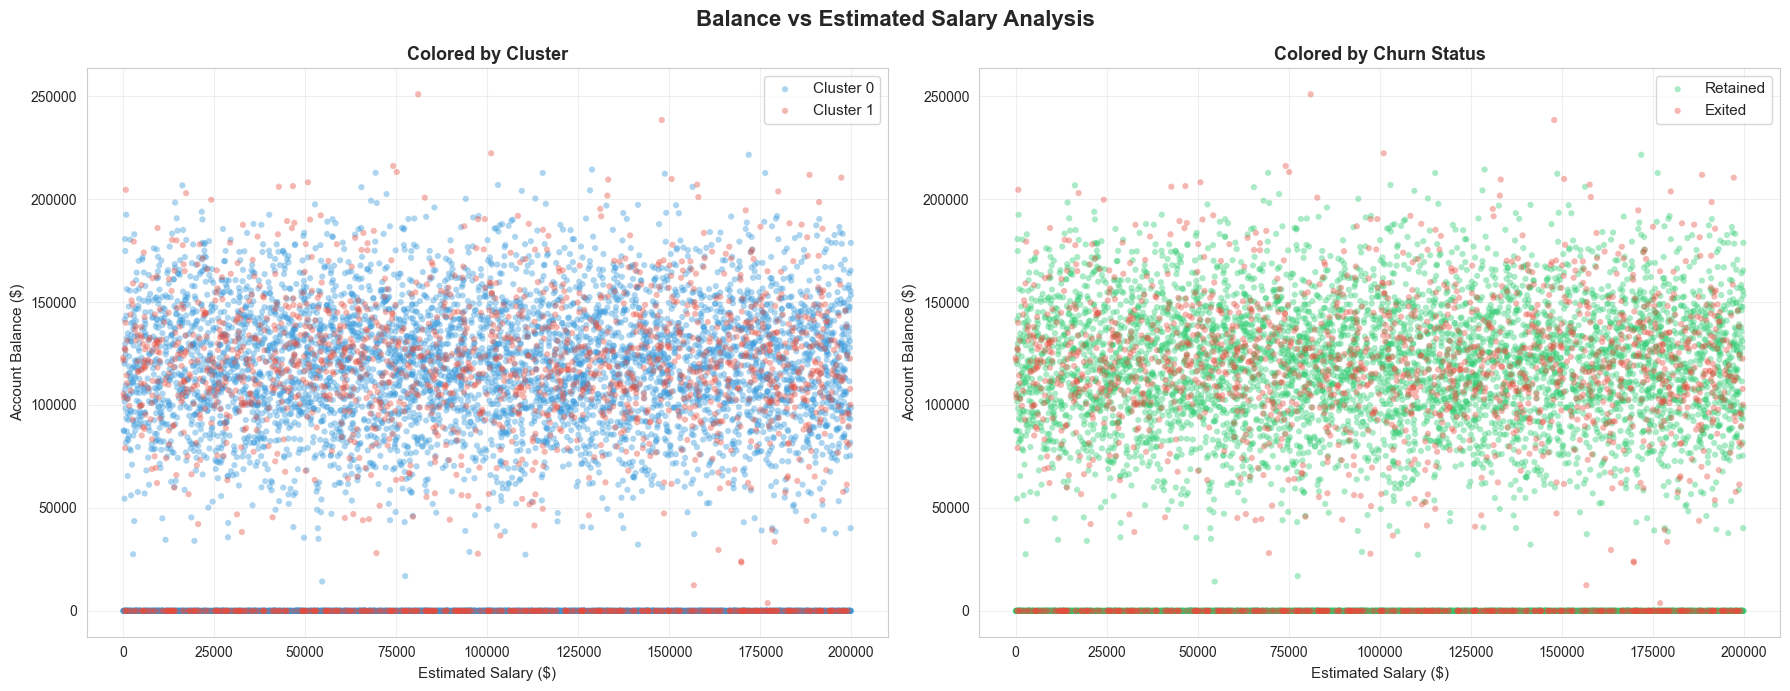

In [32]:
# Balance vs Estimated Salary scatter plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Balance vs Estimated Salary Analysis', fontsize=16, fontweight='bold')

# Plot 1: Colored by Cluster
for cluster in [0, 1]:
    cluster_data = data2[data2['class'] == cluster]
    axes[0].scatter(cluster_data['EstimatedSalary'], cluster_data['Balance'],
                   alpha=0.4, s=20, label=f'Cluster {cluster}',
                   color=cluster_colors[cluster], edgecolor='none')

axes[0].set_title('Colored by Cluster', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Estimated Salary ($)', fontsize=11)
axes[0].set_ylabel('Account Balance ($)', fontsize=11)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(alpha=0.3)

# Plot 2: Colored by Churn Status
for exited_status in [0, 1]:
    exited_data = data2[data2['Exited'] == exited_status]
    label = 'Exited' if exited_status == 1 else 'Retained'
    axes[1].scatter(exited_data['EstimatedSalary'], exited_data['Balance'],
                   alpha=0.4, s=20, label=label,
                   color=churn_colors[exited_status], edgecolor='none')

axes[1].set_title('Colored by Churn Status', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Estimated Salary ($)', fontsize=11)
axes[1].set_ylabel('Account Balance ($)', fontsize=11)
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
# Final cluster summary statistics
print("\n" + "="*80)
print("COMPREHENSIVE CLUSTER ANALYSIS SUMMARY")
print("="*80)

for cluster_id in [0, 1]:
    cluster_data = data2[data2['class'] == cluster_id]
    cluster_name = "LOW-RISK (Loyal Customers)" if cluster_id == 0 else "HIGH-RISK (Churn Prone)"
    
    print(f"\n{'─'*80}")
    print(f"CLUSTER {cluster_id}: {cluster_name}")
    print(f"{'─'*80}")
    print(f"\nSize: {len(cluster_data):,} customers ({len(cluster_data)/len(data2)*100:.1f}% of total)")
    print(f"\nKey Risk Indicators:")
    print(f"  • Churn Rate: {cluster_data['Exited'].mean()*100:.2f}%")
    print(f"  • Complaint Rate: {cluster_data['Complain'].mean()*100:.2f}%")
    print(f"  • Active Member Rate: {cluster_data['IsActiveMember'].mean()*100:.2f}%")
    
    print(f"\nDemographic Profile:")
    print(f"  • Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  • Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    
    print(f"\nFinancial Profile:")
    print(f"  • Average Credit Score: {cluster_data['CreditScore'].mean():.0f}")
    print(f"  • Average Balance: ${cluster_data['Balance'].mean():,.2f}")
    print(f"  • Average Salary: ${cluster_data['EstimatedSalary'].mean():,.2f}")
    print(f"  • Average Tenure: {cluster_data['Tenure'].mean():.1f} years")
    
    print(f"\nProduct Engagement:")
    print(f"  • Average Products: {cluster_data['NumOfProducts'].mean():.2f}")
    print(f"  • Credit Card Ownership: {cluster_data['HasCrCard'].mean()*100:.1f}%")
    print(f"  • Average Points Earned: {cluster_data['Point Earned'].mean():.0f}")
    print(f"  • Average Satisfaction Score: {cluster_data['Satisfaction Score'].mean():.2f}")
    
    print(f"\nTop Card Types:")
    top_cards = cluster_data['Card Type'].value_counts().head(3)
    for card, count in top_cards.items():
        print(f"  • {card}: {count:,} ({count/len(cluster_data)*100:.1f}%)")

print(f"\n{'='*80}")
print(f"\nCLUSTERING EFFECTIVENESS:")
print(f"  • Silhouette Score: 0.6129 (Good separation)")
print(f"  • Davies-Bouldin Index: 0.6144 (Lower is better)")
print(f"  • Churn Prediction Accuracy: {((data2['class'] == data2['Exited']).sum() / len(data2) * 100):.2f}%")
print(f"\nKEY INSIGHT: Cluster 1 shows {(data2[data2['class']==1]['Exited'].mean() / data2[data2['class']==0]['Exited'].mean()):.1f}x higher churn risk")
print(f"             compared to Cluster 0, making it ideal for targeted retention campaigns.")
print(f"\n{'='*80}\n")


COMPREHENSIVE CLUSTER ANALYSIS SUMMARY

────────────────────────────────────────────────────────────────────────────────
CLUSTER 0: LOW-RISK (Loyal Customers)
────────────────────────────────────────────────────────────────────────────────

Size: 7,961 customers (79.6% of total)

Key Risk Indicators:
  • Churn Rate: 0.01%
  • Complaint Rate: 0.10%
  • Active Member Rate: 55.45%

Demographic Profile:
  • Average Age: 37.4 years
  • Age Range: 18-92 years

Financial Profile:
  • Average Credit Score: 652
  • Average Balance: $72,731.03
  • Average Salary: $99,716.39
  • Average Tenure: 5.0 years

Product Engagement:
  • Average Products: 1.54
  • Credit Card Ownership: 70.7%
  • Average Points Earned: 607
  • Average Satisfaction Score: 3.02

Top Card Types:
  • GOLD: 2,020 (25.4%)
  • SILVER: 1,995 (25.1%)
  • PLATINUM: 1,986 (24.9%)

────────────────────────────────────────────────────────────────────────────────
CLUSTER 1: HIGH-RISK (Churn Prone)
─────────────────────────────────────